# Importing The Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

In [4]:
import pickle

# Loading Data

In [5]:
df = pd.read_csv('/Users/aritrar/Documents/ML/heart/heart_2020_cleaned.csv')

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Understanding  Data

In [7]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
# no null values present 

# Checking for the different categories in Qualitative Values 

In [10]:
for i in df:                 
    if df[i].dtype == object:
        print(i + ':')
        print(df[i].unique(),'\n')

HeartDisease:
['No' 'Yes'] 

Smoking:
['Yes' 'No'] 

AlcoholDrinking:
['No' 'Yes'] 

Stroke:
['No' 'Yes'] 

DiffWalking:
['No' 'Yes'] 

Sex:
['Female' 'Male'] 

AgeCategory:
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race:
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic:
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity:
['Yes' 'No'] 

GenHealth:
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

Asthma:
['Yes' 'No'] 

KidneyDisease:
['No' 'Yes'] 

SkinCancer:
['Yes' 'No'] 



# Separating Label, One - Hot Values and Quantitative values

In [11]:
label = []
one_hot = []
quan = []

for i in df:                 
    if df[i].dtype == object and (i == 'AgeCategory' or i == 'Race' or i == 'Sex'):
        one_hot.append(i)
    elif df[i].dtype == object:
        label.append(i)
    else:
        quan.append(i)
        
print(label)
print()
print(one_hot)
print()
print(quan)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

['Sex', 'AgeCategory', 'Race']

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


# EDA

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

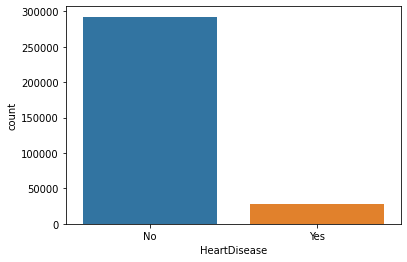

In [12]:
sns.countplot(df['HeartDisease'])

<AxesSubplot:xlabel='BMI', ylabel='SleepTime'>

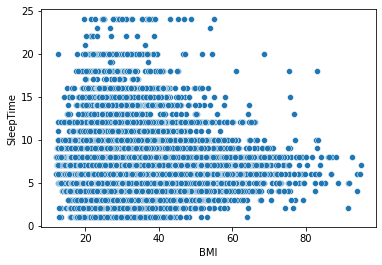

In [13]:
sns.scatterplot(data = df, x = 'BMI', y = 'SleepTime')

<AxesSubplot:xlabel='BMI', ylabel='PhysicalHealth'>

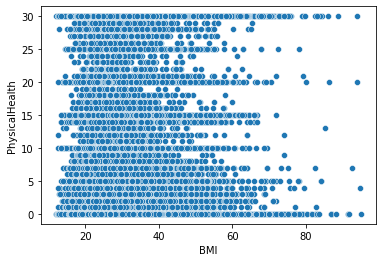

In [14]:
sns.scatterplot(data = df, x = 'BMI', y = 'PhysicalHealth')

<AxesSubplot:xlabel='BMI', ylabel='MentalHealth'>

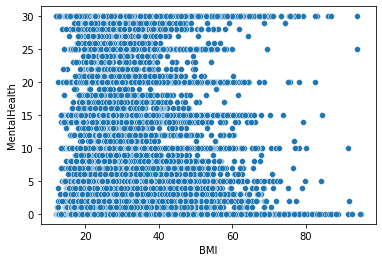

In [15]:
sns.scatterplot(data = df, x = 'BMI', y = 'MentalHealth')

<AxesSubplot:xlabel='PhysicalHealth', ylabel='MentalHealth'>

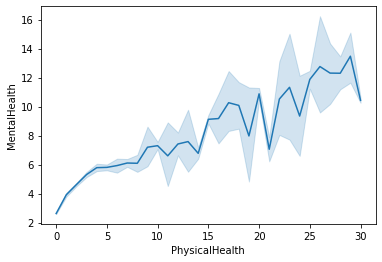

In [16]:
sns.lineplot(data = df, x = 'PhysicalHealth', y = 'MentalHealth')

<AxesSubplot:xlabel='SleepTime', ylabel='MentalHealth'>

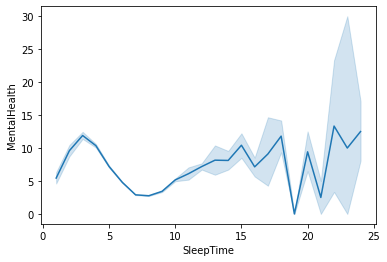

In [17]:
sns.lineplot(data = df, x = 'SleepTime', y = 'MentalHealth')

<AxesSubplot:xlabel='SleepTime', ylabel='PhysicalHealth'>

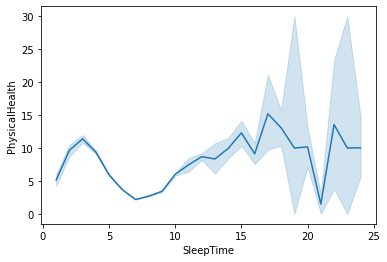

In [18]:
sns.lineplot(data = df, x = 'SleepTime', y = 'PhysicalHealth')

# One - Hot Encoding

In [19]:
df = pd.get_dummies(df, columns = one_hot)

In [20]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,No,16.60,Yes,No,No,3.0,30.0,No,Yes,Yes,Very good,5.0,Yes,No,Yes,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,No,Yes,Very good,7.0,No,No,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,No,26.58,Yes,No,No,20.0,30.0,No,Yes,Yes,Fair,8.0,Yes,No,No,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,No,24.21,No,No,No,0.0,0.0,No,No,No,Good,6.0,No,No,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,No,23.71,No,No,No,28.0,0.0,Yes,No,Yes,Very good,8.0,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Label Encoding

In [21]:
label_encoder = preprocessing.LabelEncoder()

In [22]:
for i in label:
    if i != 'GenHealth':
        print(i)
        df[i] = label_encoder.fit_transform(df[i])
        print(df[i].unique())
        print()

df["GenHealth"].replace({"Excellent": 4, "Very good": 3, "Good": 2, 'Fair': 1, "Poor": 0}, inplace=True)
print('GenHealth')
print(df['GenHealth'].unique())

HeartDisease
[0 1]

Smoking
[1 0]

AlcoholDrinking
[0 1]

Stroke
[0 1]

DiffWalking
[0 1]

Diabetic
[2 0 1 3]

PhysicalActivity
[1 0]

Asthma
[1 0]

KidneyDisease
[0 1]

SkinCancer
[1 0]

GenHealth
[3 1 2 0 4]


<AxesSubplot:>

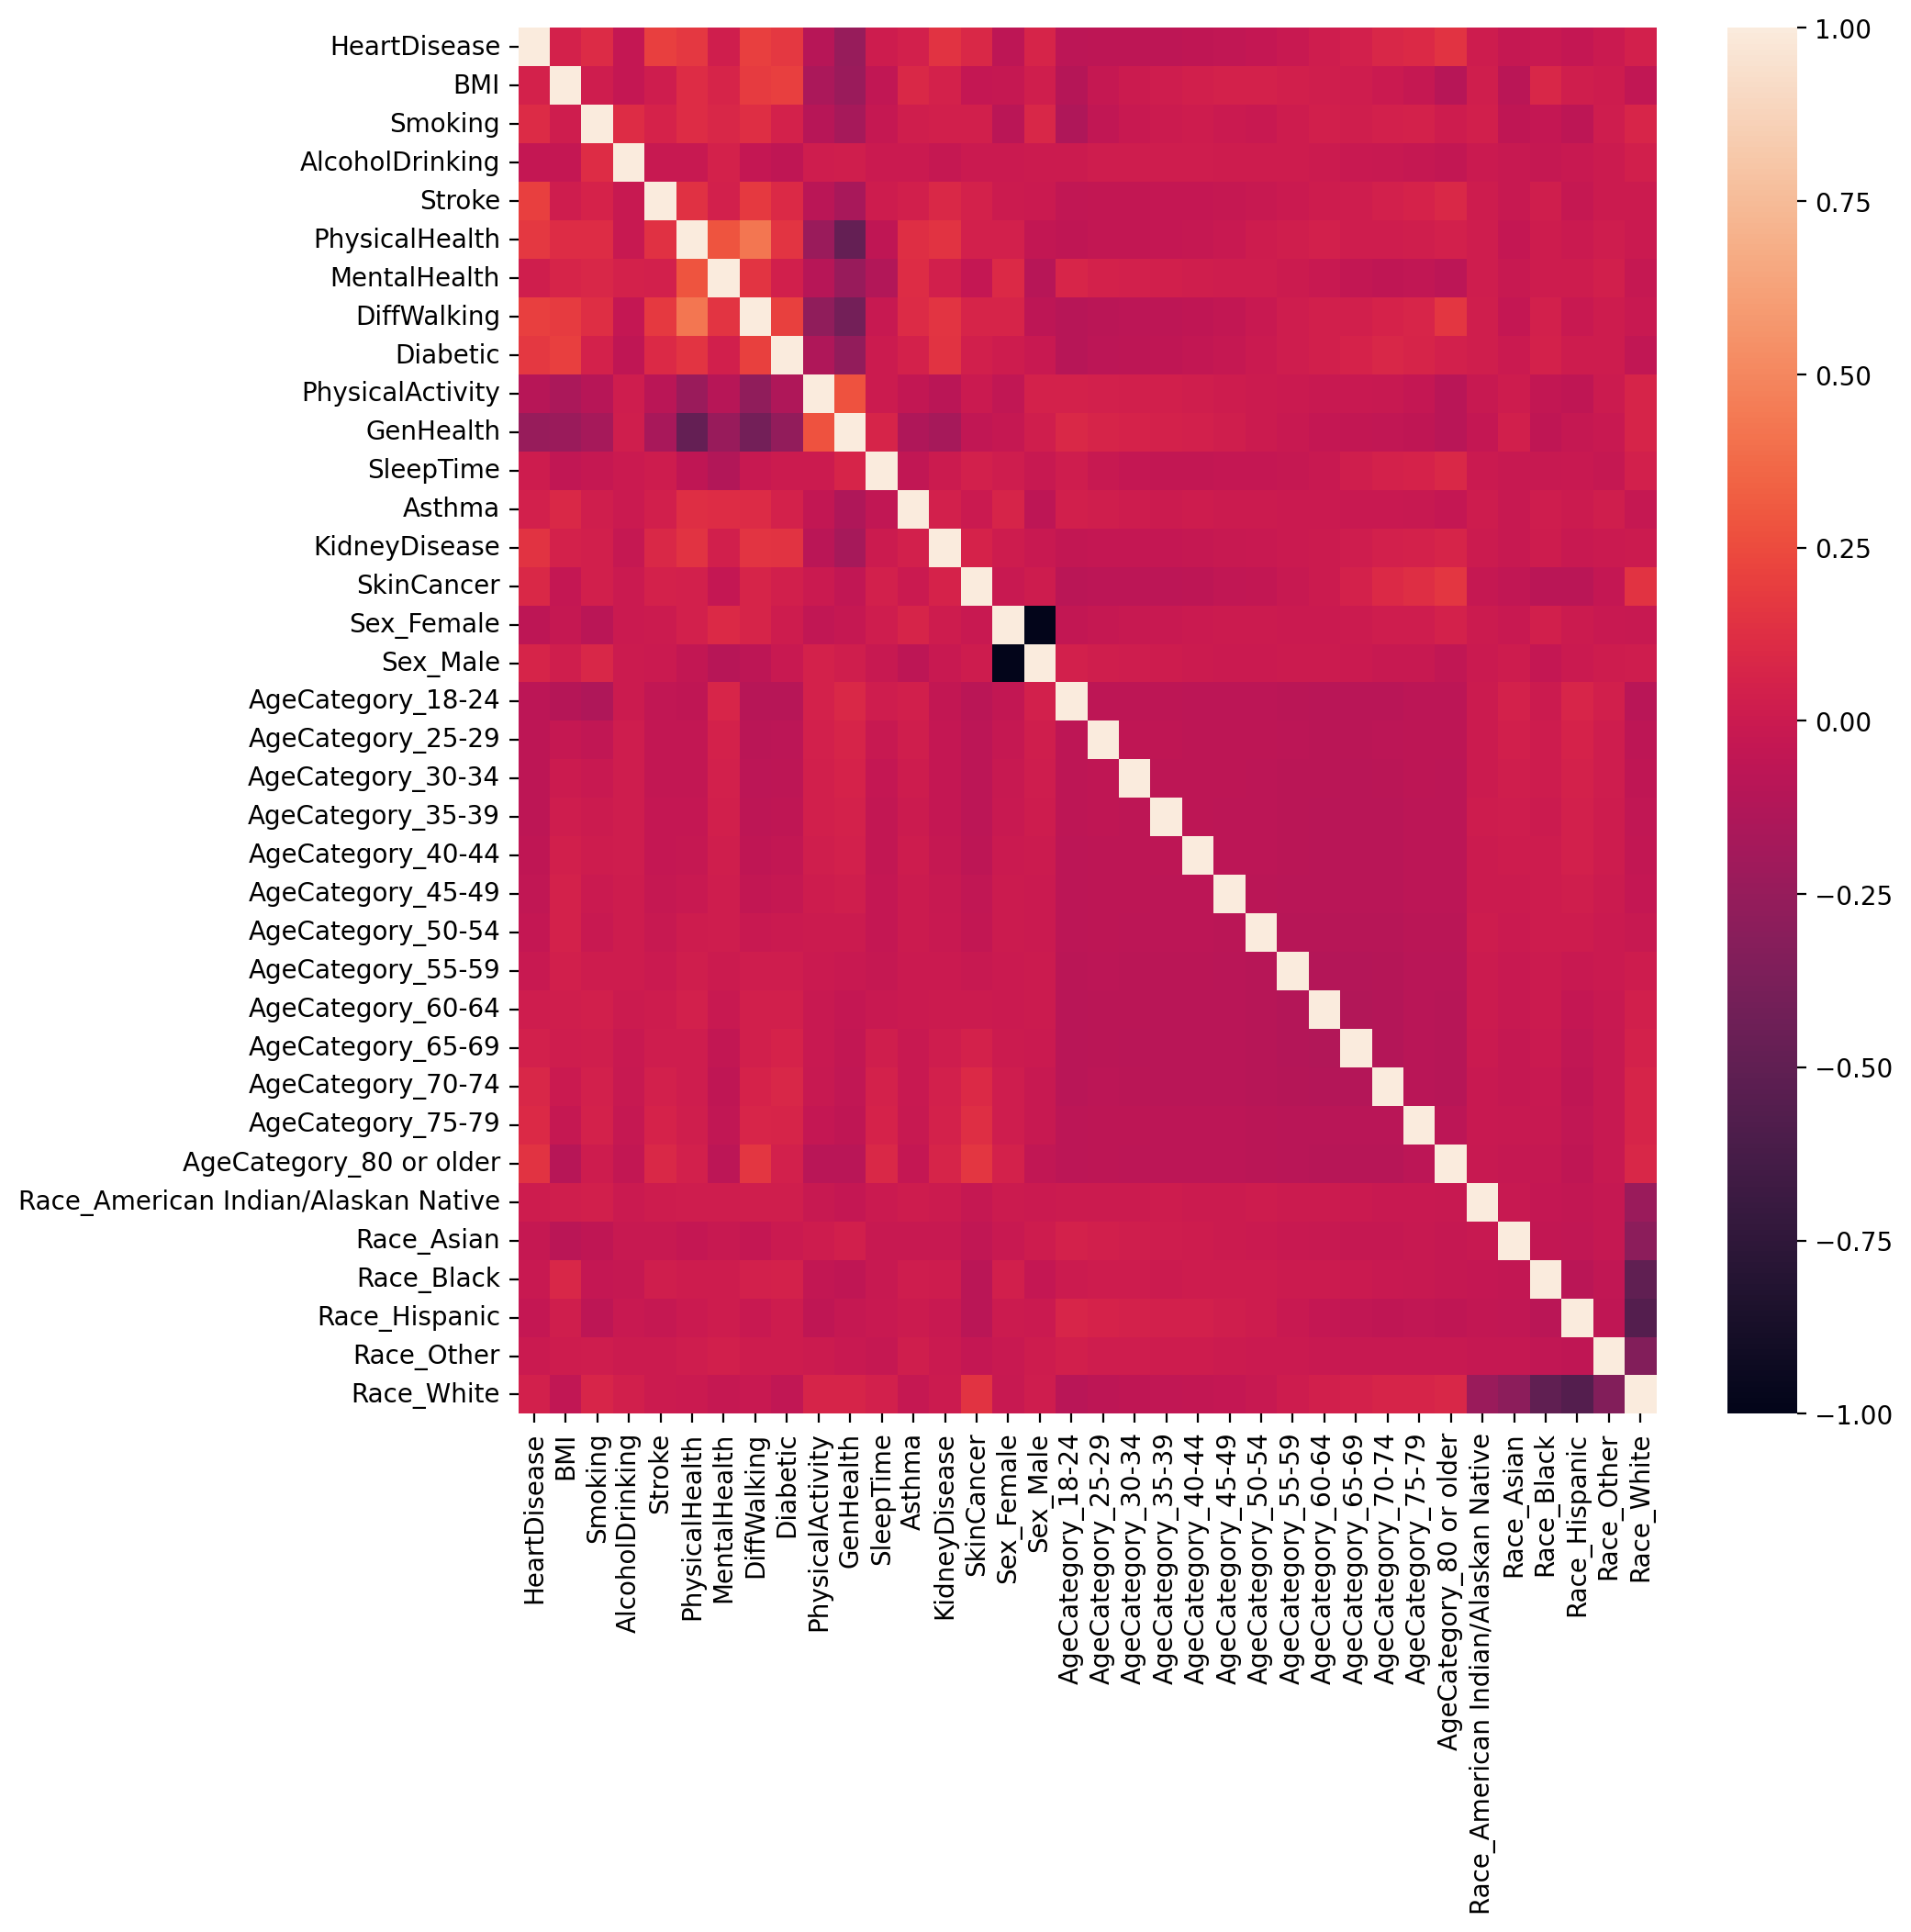

In [23]:
plt.figure(figsize = (10,10), dpi = 200)
sns.heatmap(df.corr())

# SMOTE 

In [24]:
sm = SMOTE(sampling_strategy = 'minority', random_state = 42)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('HeartDisease', axis = 1), df['HeartDisease'])
df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [25]:
X = df.drop(['HeartDisease'],axis = 1)
y = df['HeartDisease']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

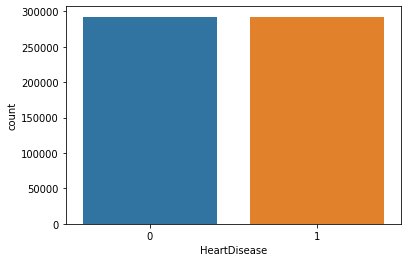

In [26]:
sns.countplot(df['HeartDisease'])

# Preparing Data For Split and Training

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    accuracy = accuracy_score(preds, y_test)
    
    print(f'Accuracy IS {accuracy}')
    return preds

# Logistic Regressor with Confusion Matrix and ROC Curve

In [28]:
lgr = LogisticRegression(random_state = 0, max_iter = 3000)
preds = run_model(lgr, X_train, y_train, X_test, y_test)

Accuracy IS 0.856868059058383


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


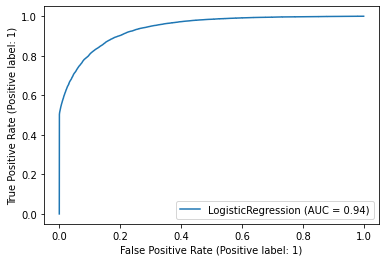

In [29]:
metrics.plot_roc_curve(lgr, X_test, y_test)

In [30]:
cm = confusion_matrix(y_test, preds)

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lgr.classes_)

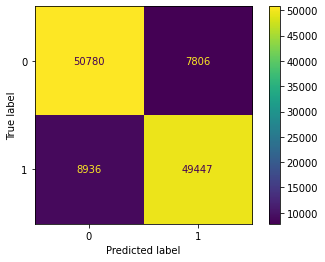

In [32]:
disp.plot()

# Decision Tree Classifier with Confusion Matrix and ROC Curve

In [33]:
dtc = DecisionTreeClassifier(random_state = 0)
preds = run_model(dtc, X_train, y_train, X_test, y_test)

Accuracy IS 0.8992724568047944


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


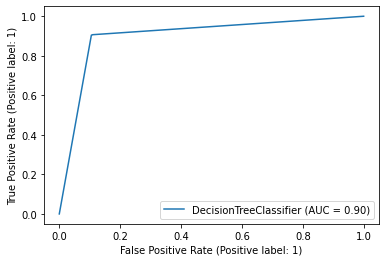

In [34]:
metrics.plot_roc_curve(dtc, X_test, y_test)

In [35]:
cm1 = confusion_matrix(y_test, preds)

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = dtc.classes_)

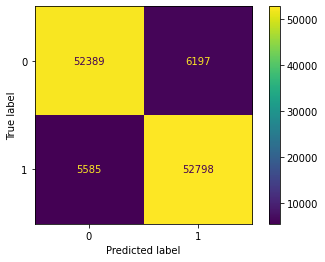

In [37]:
disp.plot()

# Random Forest Classifier with Confusion Matrix and ROC Curve

In [38]:
rfc = RandomForestClassifier(max_depth = 8, random_state = 0)
preds = run_model(rfc, X_train, y_train, X_test,y_test)

Accuracy IS 0.7940137985278151


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


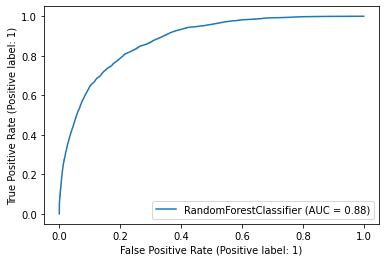

In [39]:
metrics.plot_roc_curve(rfc, X_test, y_test)

In [40]:
cm2 = confusion_matrix(y_test, preds)

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = rfc.classes_)

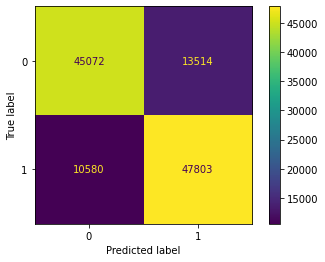

In [42]:
disp.plot()

# KNN with Confusion Matrix and ROC Curve

In [43]:
knn = KNeighborsClassifier(n_neighbors = 5)
preds = run_model(knn, X_train, y_train, X_test, y_test)

Accuracy IS 0.8446596961588113


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


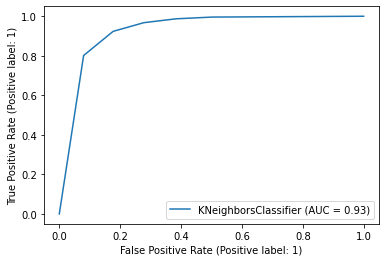

In [44]:
metrics.plot_roc_curve(knn, X_test, y_test)

In [45]:
cm3 = confusion_matrix(y_test, preds)

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = knn.classes_)

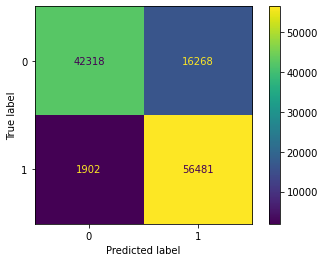

In [47]:
disp.plot()

# XGBoost with Confusion Matrix and ROC Curve

In [48]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)

accuracy = accuracy_score(preds, y_test)
    
print(f'Accuracy IS {accuracy}')

Accuracy IS 0.8936470346844035


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


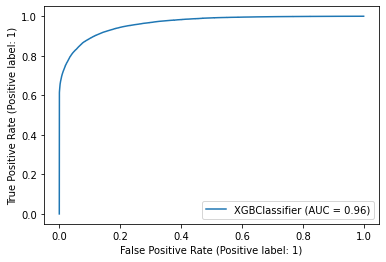

In [49]:
metrics.plot_roc_curve(xgb, X_test, y_test)

In [50]:
cm4 = confusion_matrix(y_test, preds)

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm4, display_labels = xgb.classes_)

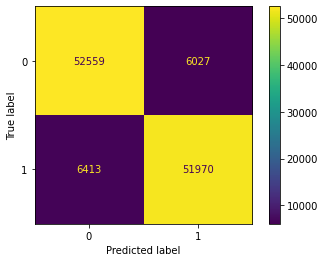

In [52]:
disp.plot()

# Naive Bayes with Confusion Matrix and ROC Curve

In [53]:
nb = GaussianNB()
preds = run_model(nb, X_train, y_train, X_test, y_test)

Accuracy IS 0.7570552881532714


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


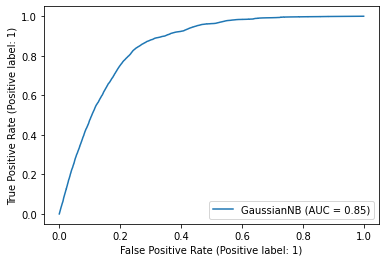

In [54]:
metrics.plot_roc_curve(nb, X_test, y_test)

In [55]:
cm5 = confusion_matrix(y_test, preds)

In [56]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm5, display_labels = nb.classes_)

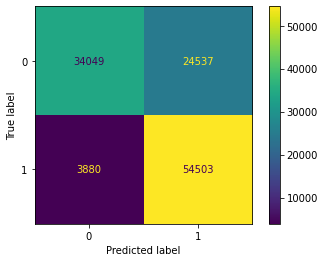

In [57]:
disp.plot()

# SGD with Confusion Matrix and ROC Curve

In [58]:
sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
preds = run_model(sgd, X_train, y_train, X_test, y_test)

Accuracy IS 0.8576289444211714


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


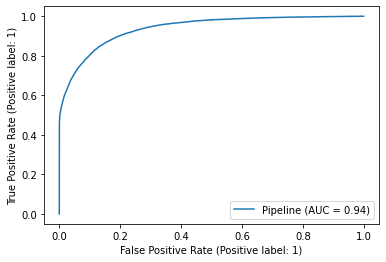

In [59]:
metrics.plot_roc_curve(sgd, X_test, y_test)

In [60]:
cm6 = confusion_matrix(y_test, preds)

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm6, display_labels = sgd.classes_)

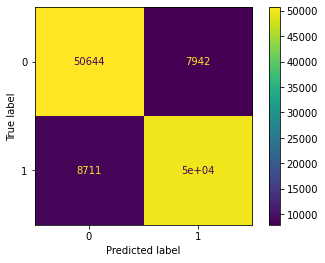

In [62]:
disp.plot()

# Linear SVC with Confusion Matrix and ROC Curve

In [63]:
lsvc = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, max_iter = 10000))
preds = run_model(lsvc, X_train, y_train, X_test, y_test)

Accuracy IS 0.8567569184997734


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


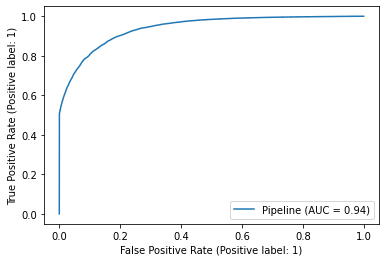

In [64]:
metrics.plot_roc_curve(lsvc, X_test, y_test)

In [65]:
cm7 = confusion_matrix(y_test, preds)

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm7, display_labels = lsvc.classes_)

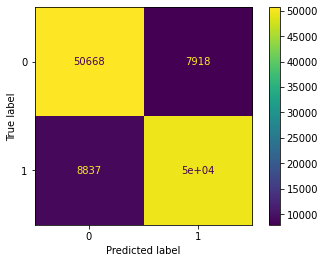

In [67]:
disp.plot()

# Saving Model Using Pickle

In [68]:
pickle.dump(dtc, open('/Users/aritrar/cleanheart/Models/heart_model.pkl', 'wb'))